# Análisis de Ventas de una Tienda Minorista
Este notebook analiza un conjunto de datos de ventas ficticio, utilizando Pandas y visualizaciones con Matplotlib y Seaborn.

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style='whitegrid')

In [3]:
# Abre Ventana para cargar csv
from google.colab import files
uploaded = files.upload()
# Cargar archivo CSV
df = pd.read_csv('ventas_tienda.csv')
df.head()

Saving ventas_tienda.csv to ventas_tienda.csv


,Fecha,Producto,Cantidad,PrecioUnitario
0,2025-05-01,Pan,4,0.5
1,2025-05-01,Leche,2,1.2
2,2025-05-02,Queso,1,3.5
3,2025-05-02,Pan,3,0.5
4,2025-05-03,Leche,2,1.2


In [4]:
# Crear nuevas columnas derivadas
df['TotalVenta'] = df['Cantidad'] * df['PrecioUnitario']
df['DiaSemana'] = pd.to_datetime(df['Fecha']).dt.day_name()
df['Categoria'] = df['Producto'].apply(lambda x: 'Lácteos' if x in ['Leche', 'Queso'] else 'Panadería')
df['Volumen'] = df['Cantidad'].apply(lambda x: 'Alto' if x >= 3 else 'Bajo')
df.head()

,Fecha,Producto,Cantidad,PrecioUnitario,TotalVenta,DiaSemana,Categoria,Volumen
0,2025-05-01,Pan,4,0.5,2.0,Thursday,Panadería,Alto
1,2025-05-01,Leche,2,1.2,2.4,Thursday,Lácteos,Bajo
2,2025-05-02,Queso,1,3.5,3.5,Friday,Lácteos,Bajo
3,2025-05-02,Pan,3,0.5,1.5,Friday,Panadería,Alto
4,2025-05-03,Leche,2,1.2,2.4,Saturday,Lácteos,Bajo


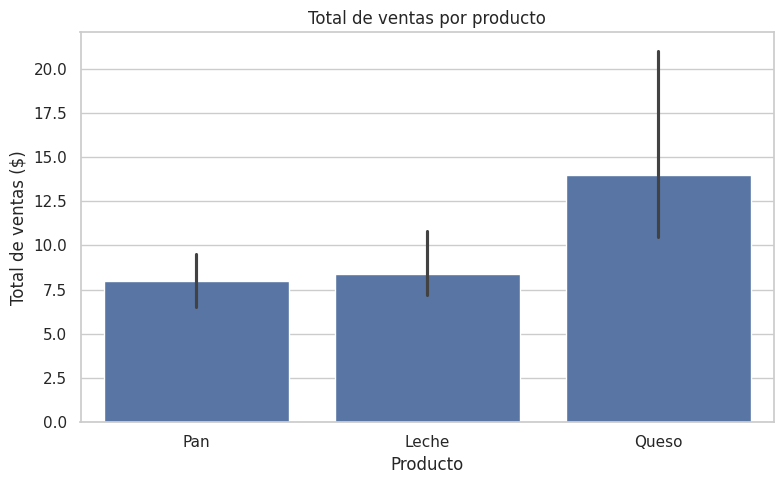

In [5]:
# Visualización 1: Total de ventas por producto
plt.figure(figsize=(8,5))
sns.barplot(x='Producto', y='TotalVenta', data=df, estimator=sum)
plt.title('Total de ventas por producto')
plt.xlabel('Producto')
plt.ylabel('Total de ventas ($)')
plt.tight_layout()
plt.show()

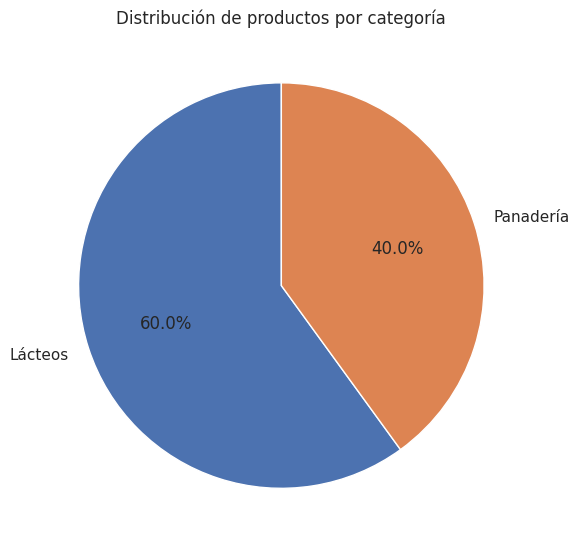

In [6]:
# Visualización 2: Distribución por categoría de productos
plt.figure(figsize=(6,6))
df['Categoria'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribución de productos por categoría')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Conclusiones
- Se observa que el producto más vendido en total es el Pan.
- La mayoría de los productos pertenecen a la categoría 'Panadería'.
- El análisis puede ser útil para tomar decisiones sobre inventario y promociones.